# KPI Forecasting

## Initial reading

Great book about forecasting: <a href= https://otexts.com/fpp2/> link</a>
Trend, seasonality and cycles : https://otexts.com/fpp2/tspatterns.html#tspatterns

Good article about time-series forecasting: <a href="https://towardsdatascience.com/an-overview-of-time-series-forecasting-models-a2fa7a358fcb">link</a>


Time series analysis with pandas: <a href="https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/#">link</a> 

Time series example using Prophet: <a href=
https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a>link</a>

## Data clean-up

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

import seaborn as sns

In [2]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 8)})

In [3]:
df = pd.read_excel('data_kpi_forecasting.xlsx')

Lets see how the data looks like after import.

In [4]:
df.shape

(1056, 1)

In [5]:
df.head()

,time;kpi
0,2020-08-10 00:00;306
1,2020-08-10 00:15;315
2,2020-08-10 00:30;301
3,2020-08-10 00:45;266
4,2020-08-10 01:00;314


Lets check the data types:

In [6]:
df[['time','kpi']] =df['time;kpi'].str.split(';', 1, expand=True)
df = df.drop(columns=['time;kpi'])

In [7]:
df.shape

(1056, 2)

In [8]:
df.dtypes

time    object
kpi     object
dtype: object

Unfortunatelly both of the columns are in object type, ideally the **time should have a type DateTime** and the **kpi should have the type int**

In [9]:
df.head()

,time,kpi
0,2020-08-10 00:00,306
1,2020-08-10 00:15,315
2,2020-08-10 00:30,301
3,2020-08-10 00:45,266
4,2020-08-10 01:00,314


**Convert the time column to DateTime object**

In [10]:
df['time'] = pd.to_datetime(df['time'])

**Check the NaN values in the kPI columns**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1056 non-null   datetime64[ns]
 1   kpi     1056 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.6+ KB


In [12]:
df.head()

,time,kpi
0,2020-08-10 00:00:00,306
1,2020-08-10 00:15:00,315
2,2020-08-10 00:30:00,301
3,2020-08-10 00:45:00,266
4,2020-08-10 01:00:00,314


Now that the **time column** is the correct data type, let’s **set it as the DataFrame’s index**.

In [13]:
df = df.set_index('time')
df.head()

,kpi
time,
2020-08-10 00:00:00,306
2020-08-10 00:15:00,315
2020-08-10 00:30:00,301
2020-08-10 00:45:00,266
2020-08-10 01:00:00,314


Set the DataFrame frequency to 15 minute

In [15]:
df = df.asfreq('15T')
df.index

DatetimeIndex(['2020-08-10 00:00:00', '2020-08-10 00:15:00',
               '2020-08-10 00:30:00', '2020-08-10 00:45:00',
               '2020-08-10 01:00:00', '2020-08-10 01:15:00',
               '2020-08-10 01:30:00', '2020-08-10 01:45:00',
               '2020-08-10 02:00:00', '2020-08-10 02:15:00',
               ...
               '2020-08-20 21:30:00', '2020-08-20 21:45:00',
               '2020-08-20 22:00:00', '2020-08-20 22:15:00',
               '2020-08-20 22:30:00', '2020-08-20 22:45:00',
               '2020-08-20 23:00:00', '2020-08-20 23:15:00',
               '2020-08-20 23:30:00', '2020-08-20 23:45:00'],
              dtype='datetime64[ns]', name='time', length=1056, freq='15T')

**Convert the kpi column to float**

In [16]:
df=df.astype(float)

In [17]:
df.dtypes

kpi    float64
dtype: object

Handle NaN Kpi values:

In [18]:
df[df['kpi'] == 'NaN']

,kpi
time,


In [19]:
print(df.loc['2020-08-10 04:15:00'])
print(df.loc['2020-08-10 04:30:00'])
print(df.loc['2020-08-10 04:45:00'])

kpi    145.0
Name: 2020-08-10 04:15:00, dtype: float64
kpi   NaN
Name: 2020-08-10 04:30:00, dtype: float64
kpi    138.0
Name: 2020-08-10 04:45:00, dtype: float64


Plot the timeseries to see the missing values

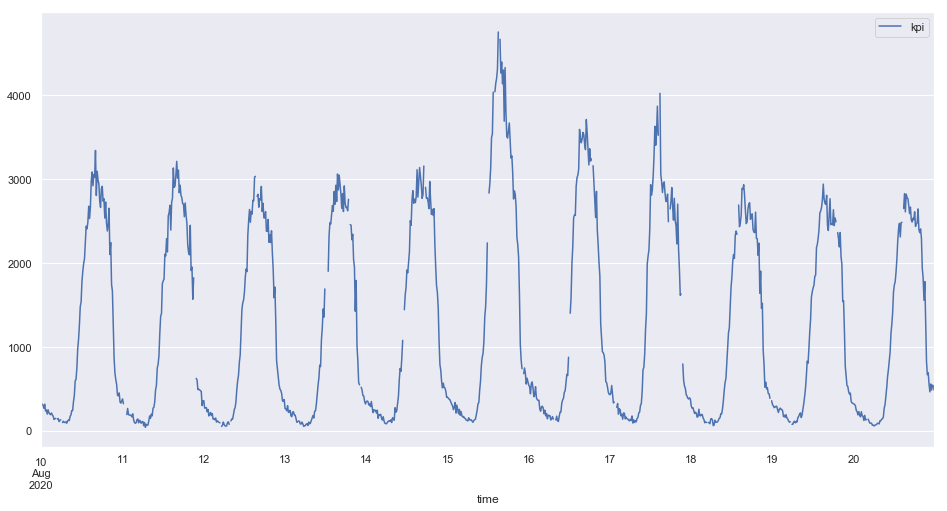

In [20]:
df.plot()

Fill NaN values with interpolation

In [21]:
df.kpi = df.kpi.interpolate()

In [22]:
print(df.loc['2020-08-10 04:15:00'])
print(df.loc['2020-08-10 04:30:00'])
print(df.loc['2020-08-10 04:45:00'])

kpi    145.0
Name: 2020-08-10 04:15:00, dtype: float64
kpi    141.5
Name: 2020-08-10 04:30:00, dtype: float64
kpi    138.0
Name: 2020-08-10 04:45:00, dtype: float64


Plot the kpi values after filling out the missing values with interpolation

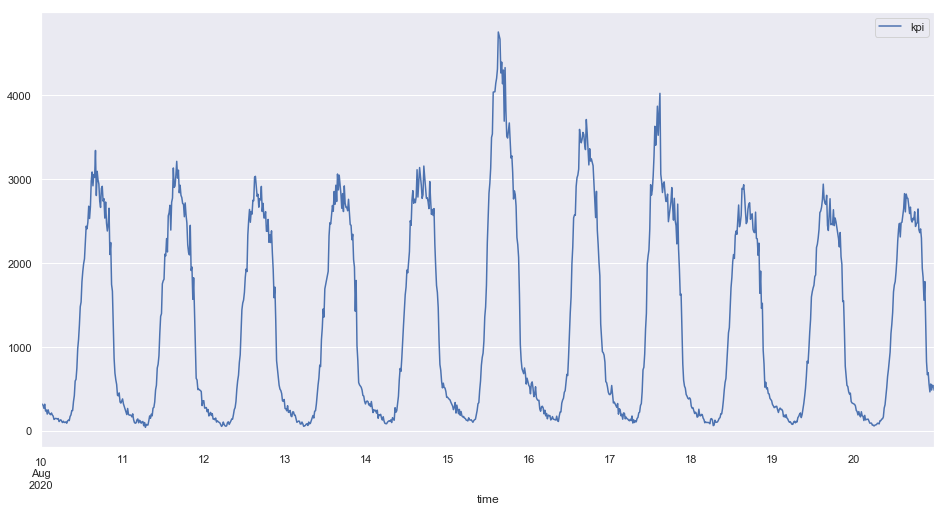

In [23]:
df.plot()

## Exploratory Data Analysis

Plot the timeseries out using seaborn

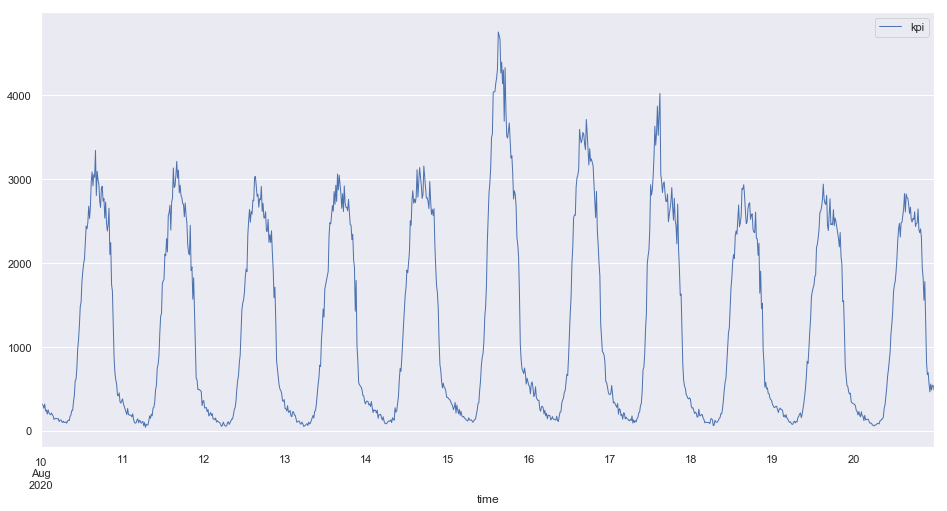

In [24]:
df.plot(linewidth=1);

## Time Series decomposition

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category.

When we decompose a time series into components, we usually combine the trend and cycle into a single trend-cycle component (sometimes called the trend for simplicity). Thus we think of a time series as comprising three components: a trend-cycle component, a seasonal component, and a remainder component (containing anything else in the time series).

Use common methods for extracting these components from a time series. Often this is done to help improve understanding of the time series, but it can also be used to improve forecast accuracy.

### Seasonality

Can we see any seasonality?
The KPI value tend to reach higher values on weekend.
One interesting thing is 18th Monday, the max values reach higher values, compared to 10th of August..

In [25]:
#Using the following link to get the day names: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html
df.index.day_name()

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday',
       'Thursday', 'Thursday', 'Thursday', 'Thursday'],
      dtype='object', name='time', length=1056)

In [26]:
df['Weekday Name'] = df.index.day_name()
df.head()

,kpi,Weekday Name
time,,
2020-08-10 00:00:00,306.0,Monday
2020-08-10 00:15:00,315.0,Monday
2020-08-10 00:30:00,301.0,Monday
2020-08-10 00:45:00,266.0,Monday
2020-08-10 01:00:00,314.0,Monday


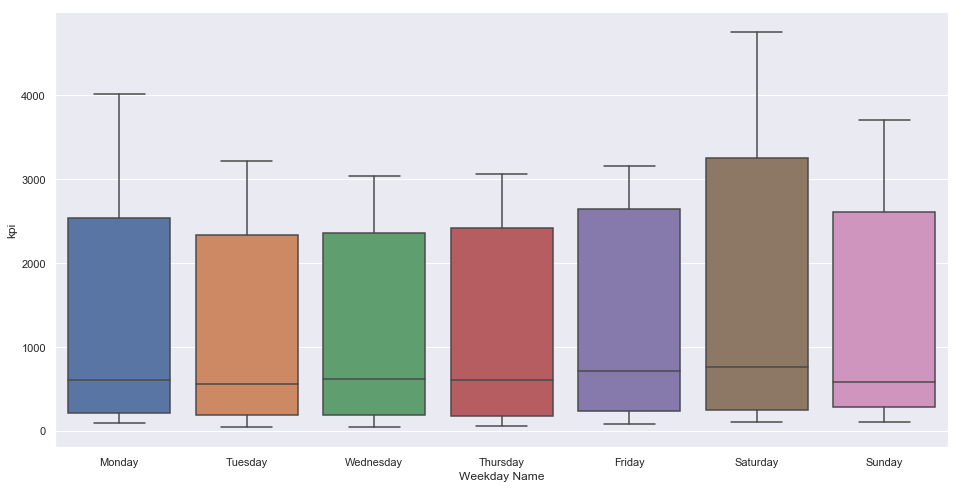

In [27]:
sns.boxplot(data=df, x ='Weekday Name', y ='kpi')

Good to know: 
Applying a rolling window to the data can also help to visualize seasonality on different time scales.
Other techniques for analyzing seasonality include autocorrelation plots, which plot the <a href="https://pandas.pydata.org/pandas-docs/stable/visualization.html#autocorrelation-plot">correlation coefficients</a> of the time series with itself at different time lags.

Time series with strong seasonality can often be well represented with models that decompose the signal into seasonality and a long-term trend, and these models can be used to forecast future values of the time series. A simple example of such a model is classical seasonal decomposition, as demonstrated in <a href=https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/>this</a> tutorial. A more sophisticated example is as Facebook’s Prophet model, which uses curve fitting to decompose the time series, taking into account seasonality on multiple time scales, holiday effects, abrupt changepoints, and long-term trends, as demonstrated in <a href= https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a>this</a> tutorial.

More questions regarding Data Analysis:
- Do we see any trend? No, not really
- Do we see any cycles? No, since we don't have that much amount of Data

**Many time series include trend, cycles and seasonality. When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.**

Drop the weekday name columns, so we dont need it anymore

In [28]:
df.drop(["Weekday Name"], axis=1, inplace=True)

### Frequencies

In [29]:
df.index

DatetimeIndex(['2020-08-10 00:00:00', '2020-08-10 00:15:00',
               '2020-08-10 00:30:00', '2020-08-10 00:45:00',
               '2020-08-10 01:00:00', '2020-08-10 01:15:00',
               '2020-08-10 01:30:00', '2020-08-10 01:45:00',
               '2020-08-10 02:00:00', '2020-08-10 02:15:00',
               ...
               '2020-08-20 21:30:00', '2020-08-20 21:45:00',
               '2020-08-20 22:00:00', '2020-08-20 22:15:00',
               '2020-08-20 22:30:00', '2020-08-20 22:45:00',
               '2020-08-20 23:00:00', '2020-08-20 23:15:00',
               '2020-08-20 23:30:00', '2020-08-20 23:45:00'],
              dtype='datetime64[ns]', name='time', length=1056, freq='15T')

Using downsampling to convert to hourly frequencies to smooth the curve. The Hourly curve is smoother because higher frequency variability has been averaged out in the resampling

In [30]:
df_hourly = df.asfreq('H')

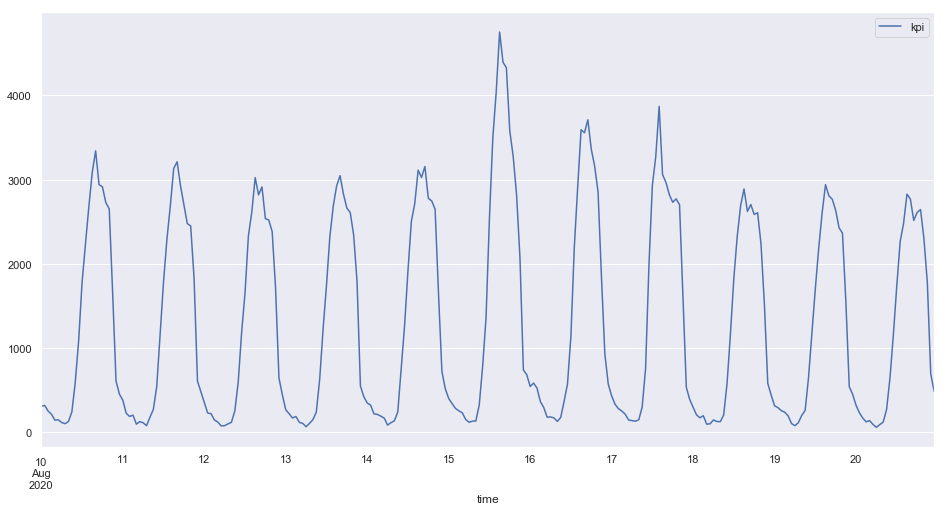

In [31]:
df_hourly.plot()

Idea: Train and test with the hourly time series

Plot the hourly data next to the 15m data

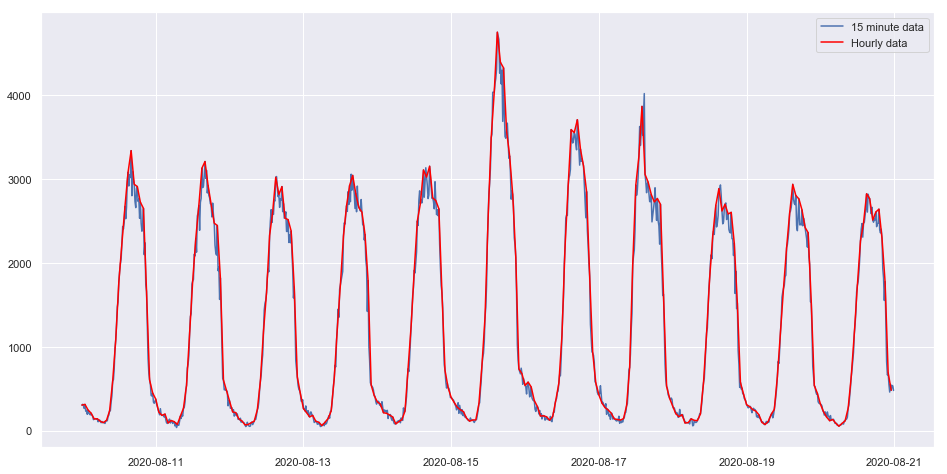

In [33]:
plt.plot(df, label="15 minute data")
plt.plot(df_hourly, color='red', label="Hourly data")
plt.legend()
plt.show()

### Rolling window

Using 6 hours rolling windows.

In [34]:
df_6h = df['kpi'].rolling(24,center=True).mean()
df_6h.head()

time
2020-08-10 00:00:00   NaN
2020-08-10 00:15:00   NaN
2020-08-10 00:30:00   NaN
2020-08-10 00:45:00   NaN
2020-08-10 01:00:00   NaN
Freq: 15T, Name: kpi, dtype: float64

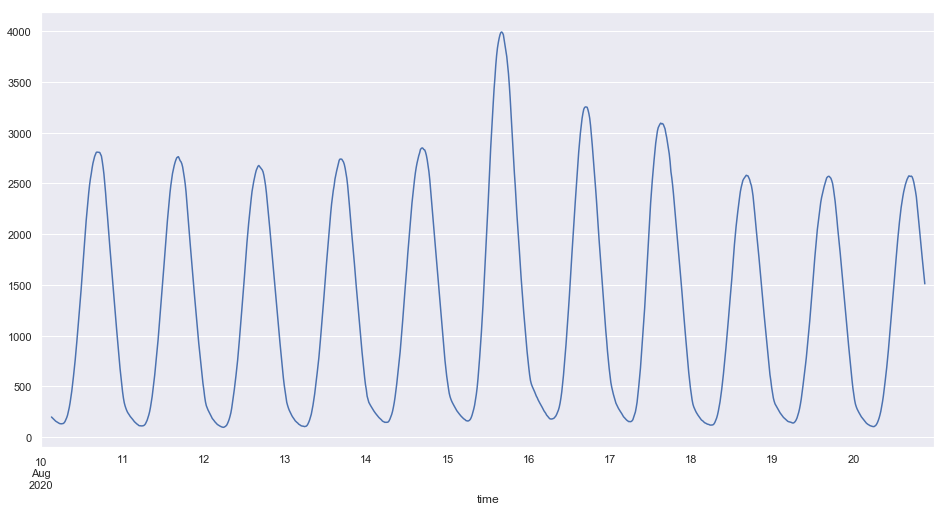

In [35]:
df_6h.plot()

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out.

### Trends

The first step in a classical decomposition is to use a moving average method to estimate the trend-cycle.

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our KPI time series has daily seasonality, let’s look at rolling means on that time scale.

Question: For taking 1 day rolling window should I use window size=96(see red) or should I try the 96x2 MA(see green below)?

Other choices for the order of the MA will usually result in trend-cycle estimates being contaminated by the seasonality in the data.

In [36]:
df_1d = df['kpi'].rolling(window=96, center=True, min_periods=95).mean()

In [37]:
df_1dx2 = df_1d.rolling(window=2, center=True).mean()

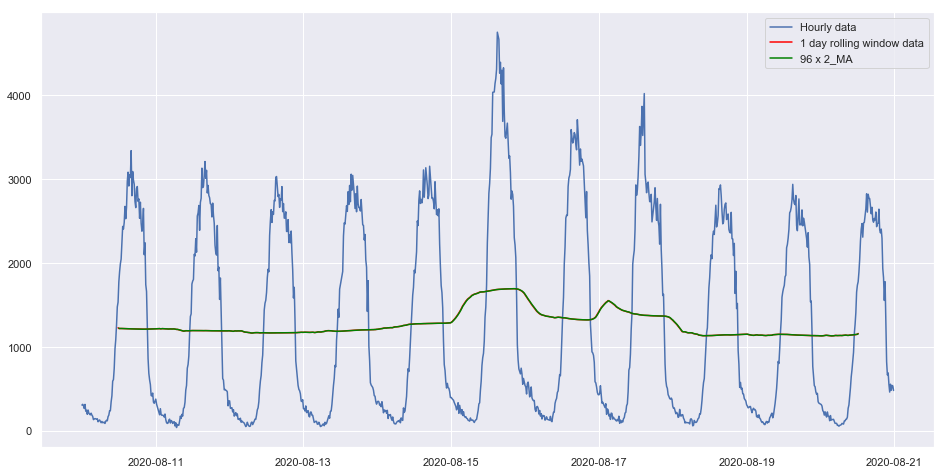

In [38]:
plt.plot(df['kpi'], label="Hourly data")
plt.plot(df_1d, color='red', label="1 day rolling window data")
plt.plot(df_1dx2, color='green', label="96 x 2_MA")
plt.legend()
plt.show()

Notice that the trend-cycle (in red) is smoother than the original data and captures the main movement of the time series without all of the minor fluctuations.

**Conclusion: By plotting the trend cycle (96-MA) against the hourly KPI data we can clearly see that there is no trend in our time series.** 

The classical decomposition methods are outdated, since:

-Classical decomposition methods assume that the seasonal component repeats from year to year. For many series, this is a reasonable assumption, but for some longer series it is not.

-The classical decomposition methods are unable to capture these seasonal changes over time.

### STL decomposition

STL is a versatile and robust method for decomposing time series. <a href="https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html#statsmodels.tsa.seasonal.STL">STL</a> is an acronym for “Seasonal and Trend decomposition using Loess”, while Loess is a method for estimating nonlinear relationships. The STL method was developed by Cleveland, Cleveland, McRae, & Terpenning (1990).

STL has several advantages over the classical, SEATS and X11 decomposition methods:

Unlike SEATS and X11, STL will handle any type of seasonality, not only monthly and quarterly data.

The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.

The smoothness of the trend-cycle can also be controlled by the user.

It can be robust to outliers (i.e., the user can specify a robust decomposition), so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

On the other hand, STL has some disadvantages. In particular, it does not handle trading day or calendar variation automatically, and it only provides facilities for additive decompositions.

**For our project these disadvantages doesn't matter, so we can use it.**

We can usually identify an additive or multiplicative time series from its variation.
If the magnitude of the seasonal component changes with time, then the series is multiplicative. Otherwise, the series is additive. **For our project the additive decomposition works**

In [39]:
#To use this we need to install a specific version of the statsmodel with: pip install statsmodels==0.12.1
#and restart the Kernel
from statsmodels.tsa.seasonal import STL

In [87]:
#df_15m.index

DatetimeIndex(['2020-08-10 00:00:00', '2020-08-10 00:15:00',
               '2020-08-10 00:30:00', '2020-08-10 00:45:00',
               '2020-08-10 01:00:00', '2020-08-10 01:15:00',
               '2020-08-10 01:30:00', '2020-08-10 01:45:00',
               '2020-08-10 02:00:00', '2020-08-10 02:15:00',
               ...
               '2020-08-20 21:30:00', '2020-08-20 21:45:00',
               '2020-08-20 22:00:00', '2020-08-20 22:15:00',
               '2020-08-20 22:30:00', '2020-08-20 22:45:00',
               '2020-08-20 23:00:00', '2020-08-20 23:15:00',
               '2020-08-20 23:30:00', '2020-08-20 23:45:00'],
              dtype='datetime64[ns]', name='time', length=1056, freq='15T')

In [40]:
df.values

array([[306.],
       [315.],
       [301.],
       ...,
       [540.],
       [535.],
       [480.]])

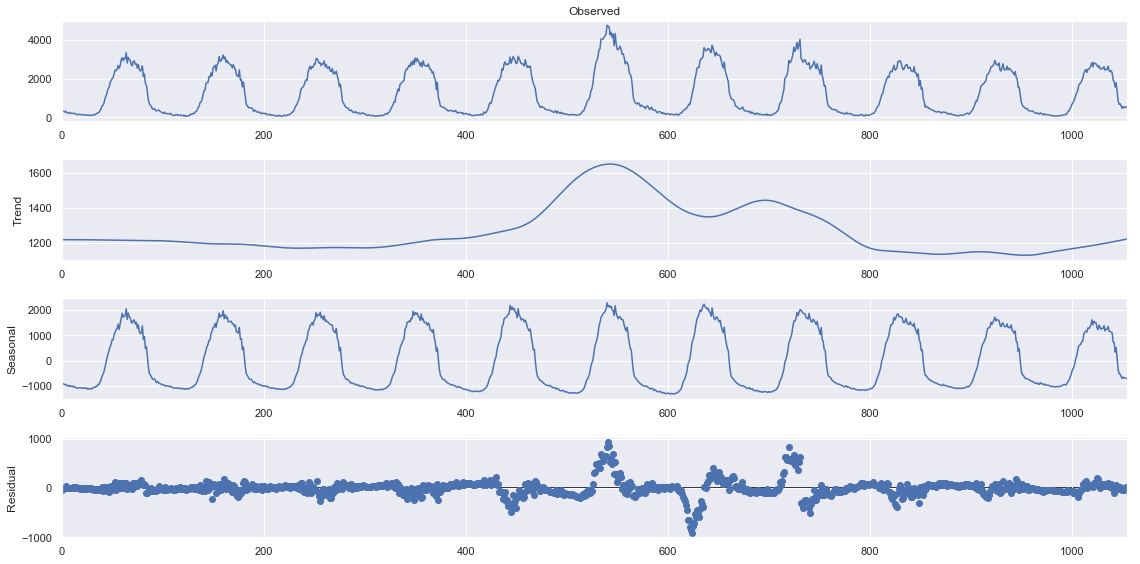

In [41]:
res_15m = STL(df.values, period = 96).fit() 
res_15m.plot()
plt.show()

**The STL decomposition worked well for determining the seasonality and the trends. 
Since the STL decomposition is robust to the outliers the estimation of the seasonal component looks accurate.**

## Modelling

The selection of the method is generally based on recognising key components of the time series (trend and seasonal) and the way in which these enter the smoothing method (e.g., in an additive, damped or multiplicative manner).

Split data into training and test set, first 8 days should be training data, last 3 should be test data

In [44]:
df.head()

,kpi
time,
2020-08-10 00:00:00,306.0
2020-08-10 00:15:00,315.0
2020-08-10 00:30:00,301.0
2020-08-10 00:45:00,266.0
2020-08-10 01:00:00,314.0


In [45]:
df.tail()

,kpi
time,
2020-08-20 22:45:00,555.0
2020-08-20 23:00:00,483.0
2020-08-20 23:15:00,540.0
2020-08-20 23:30:00,535.0
2020-08-20 23:45:00,480.0


Select the first 8 days for training using **partial-string indexing**

In [159]:
df_train = df.loc['2020-08-10':'2020-08-17']
df_train

,kpi
time,
2020-08-10 00:00:00,306.0
2020-08-10 00:15:00,315.0
2020-08-10 00:30:00,301.0
2020-08-10 00:45:00,266.0
2020-08-10 01:00:00,314.0
...,...
2020-08-17 22:45:00,410.0
2020-08-17 23:00:00,385.0
2020-08-17 23:15:00,376.0


Select the last 3 days for testing using **partial-string indexing**

In [47]:
df_test = df.loc['2020-08-18':'2020-08-20']
df_test

,kpi
time,
2020-08-18 00:00:00,292.0
2020-08-18 00:15:00,267.0
2020-08-18 00:30:00,272.0
2020-08-18 00:45:00,237.0
2020-08-18 01:00:00,203.0
...,...
2020-08-20 22:45:00,555.0
2020-08-20 23:00:00,483.0
2020-08-20 23:15:00,540.0


### Forecasting with STL

STLForecast simplifies the process of using STL to remove seasonalities and then using a standard time-series model to forecast the trend and cyclical components.

Here we use STL to handle the seasonality and then an ARIMA(1,1,0) to model the deseasonalized data. The seasonal component is forecast from the find full cycle.

The forecast automatically adds the seasonal component forecast to the ARIMA forecast.


In [48]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

One day forecast with STL

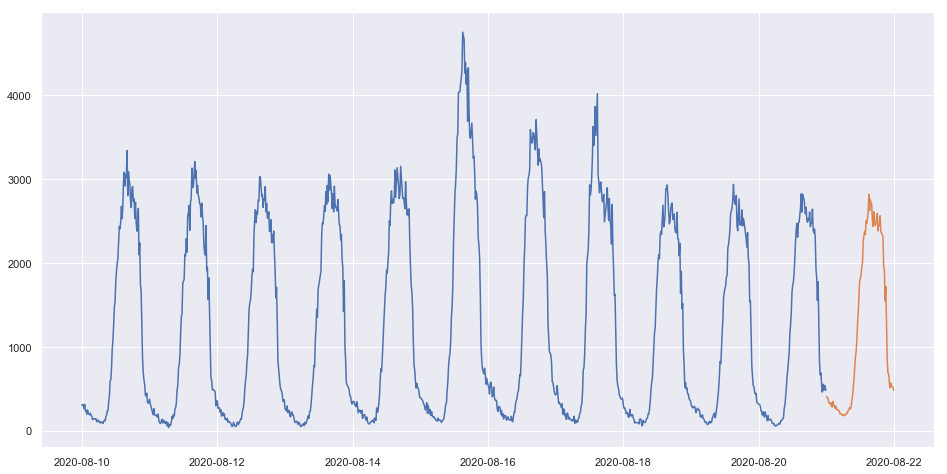

In [57]:
stlf = STLForecast(endog=df, period=96, model=ARIMA, model_kwargs=dict(order=(1,1,0), trend="c"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(96)#one day forecast ahead
plt.plot(df)
plt.plot(forecast)
plt.show()

**3 days forcast with STL on the training data and compare it with the test data**

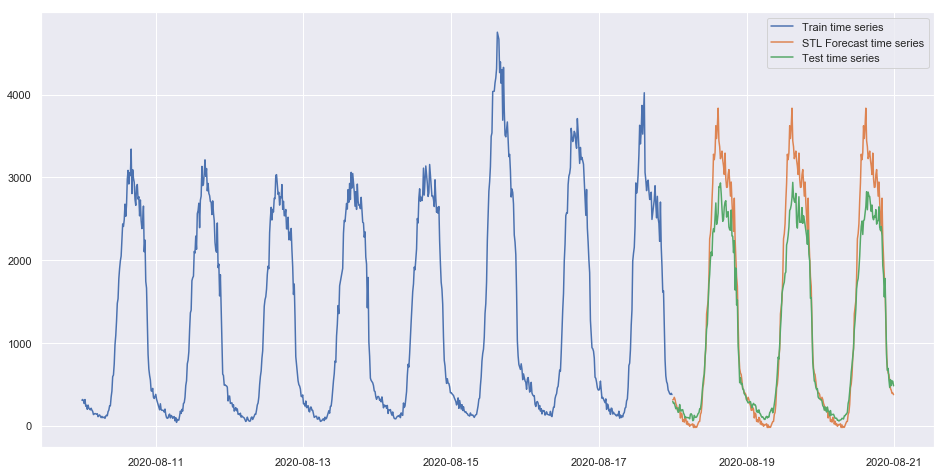

In [59]:
stlf_train = STLForecast(endog=df_train, period=96, model=ARIMA, model_kwargs=dict(order=(1,1,0), trend="c"))
stlf_res_train = stlf_train.fit()

forecast = stlf_res_train.forecast(96 * 3)#three day forecast ahead
plt.plot(df_train, label="Train time series")
plt.plot(forecast, label="STL Forecast time series")
plt.plot(df_test, label="Test time series")
plt.legend()
plt.show()

In [125]:
stlf_train_robust = STLForecast(endog=df_train, period=96, model=ARIMA, robust=True, model_kwargs=dict(order=(1,1,0), trend="c"))
stlf_res_train_robust = stlf_train.fit()

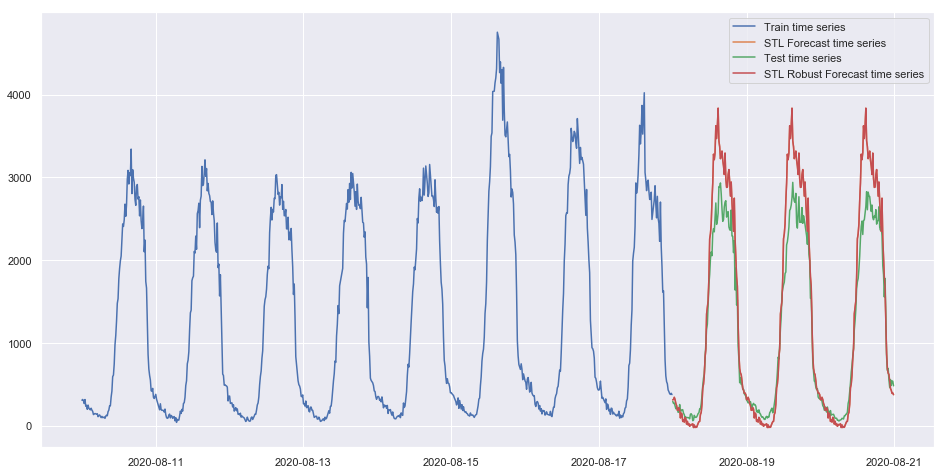

In [129]:
forecast_robust = stlf_res_train_robust.forecast(96 * 3)#three day forecast ahead
plt.plot(df_train, label="Train time series")
plt.plot(forecast, label="STL Forecast time series")
plt.plot(df_test, label="Test time series")
plt.plot(forecast_robust, label="STL Robust Forecast time series")
plt.legend()
plt.show()

In [127]:
calculate_metrics(df_test,forecast_robust)

Score with the MAE metric:  262.4928935505425
Score with the MSE metric:  151005.01239329737
Score with the RMSE metric:  388.5936340102567
Score with the r2 metric:  0.8588044696372219


In [68]:
stlf_res_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    STL Decomposition and SARIMAX Results                     
==============================================================================
Dep. Variable:                      y   No. Observations:                  768
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4472.547
Date:                Wed, 27 Jan 2021   AIC                           8951.095
Time:                        15:43:57   BIC                           8965.022
Sample:                    08-10-2020   HQIC                          8956.456
                         - 08-17-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.001e-08   7.87e+04   5.08e-13      1.000   -1.54e+05    1.54e+05
ar.L1         -0.3028      0.023    -13.150      0.000      -0.348      -0.258
sigma2      6805.1468    160.466     42.409      0.000    6490.640    7119.654
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):              1798.55
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.50
                                STL Configuration                                
=================================================================================
Period:                            96       Trend Length:                     185
Seasonal:                           7       Trend deg:                          1
Seasonal deg:                       1       Trend jump:                         1
Seasonal jump:                      1       Low pass:                          97
Robust:                         False       Low pass deg:                       1
---------------------------------------------------------------------------------

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Evaluate the Model with metrics

Metrics are used from the <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">sklean</a> library.

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Calculate MAE for the test and forecast

In [63]:
mean_absolute_error(df_test, forecast)

262.4928935505425

Calculate MSE for the test and forecast

In [64]:
mean_squared_error(df_test, forecast)

151005.01239329737

Calculate RMSE for the test and forecast, the RMSE gives a relatively high weight to large errors.

This means the RMSE should be more useful when large errors are particularly undesirable.

In [67]:
mean_squared_error(df_test, forecast, squared = False)

388.5936340102567

Calculate the coefficient of determination (R2), which is the proportion of variance in the dependent variable that is predictable from the independent variable.

It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

It provides a measure of how well observed outcomes are replicated by the model.

In [66]:
r2_score(df_test, forecast)

0.8588044696372219

Create function to calculate the scores

In [103]:
def calculate_metrics(df_test, df_forecast):
    print("Score with the MAE metric: ", mean_absolute_error(df_test, df_forecast))
    print("Score with the MSE metric: ", mean_squared_error(df_test, df_forecast))
    print("Score with the RMSE metric: ", mean_squared_error(df_test, df_forecast, squared = False))
    print("Score with the r2 metric: ", r2_score(df_test, df_forecast))
    

**Calculate scores for the STL forecast with ARIMA(1,1,0):**

In [119]:
calculate_metrics(df_test,forecast)

Score with the MAE metric:  262.4928935505425
Score with the MSE metric:  151005.01239329737
Score with the RMSE metric:  388.5936340102567
Score with the r2 metric:  0.8588044696372219


**Which one to chose?**

From an interpretation standpoint, **MAE** is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

**RMSE** has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

### Exponential Smoothing

 Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight. This framework generates reliable forecasts quickly and for a wide range of time series.

#### Holt's Winters Seasonal Exponential Smoothing

 A method that often provides accurate and robust forecasts for seasonal data is the Holt-Winters method with a damped trend and multiplicative seasonality

**In our case there is no trend, question is that can we still use the Holt's Winters Seasonal exponential smoothing?**

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing

In [160]:
fit1 = ExponentialSmoothing(df_train, seasonal_periods=96, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(df_train, seasonal_periods=96, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(df_train, seasonal_periods=96, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(df_train, seasonal_periods=96, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()

C:\Users\esziger\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\esziger\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [161]:
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["(Add Trend, Add Seasonality)"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["(Add Trend, Mult Seasonality)"] = [fit2.params[p] for p in params] + [fit2.sse]
results["(Add Damped Trend, Add Seasonality)"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["(Add Damped Trend, Mult Seasonality)"] = [fit4.params[p] for p in params] + [fit4.sse]

In [162]:
results

,"(Add Trend, Add Seasonality)","(Add Trend, Mult Seasonality)","(Add Damped Trend, Add Seasonality)","(Add Damped Trend, Mult Seasonality)"
$\alpha$,4.801679e-01,4.879663e-01,4.797045e-01,4.889182e-01
$\beta$,1.546402e-13,1.253607e-14,6.332263e-08,5.714806e-06
$\phi$,NaN,NaN,9.100445e-01,9.190767e-01
$\gamma$,1.753015e-13,5.319238e-13,6.868088e-08,1.493468e-03
$l_0$,9.057058e+00,8.818947e+00,8.983810e+00,8.818299e+00
$b_0$,1.933453e-04,-1.553309e-04,3.490962e-02,3.400530e-02
SSE,8.444732e+06,8.516693e+06,8.448707e+06,8.523284e+06


Plot the results

In [163]:
df_train.columns= ["Training KPI values"]

In [164]:
df_test.columns = ["Test KPI values"]

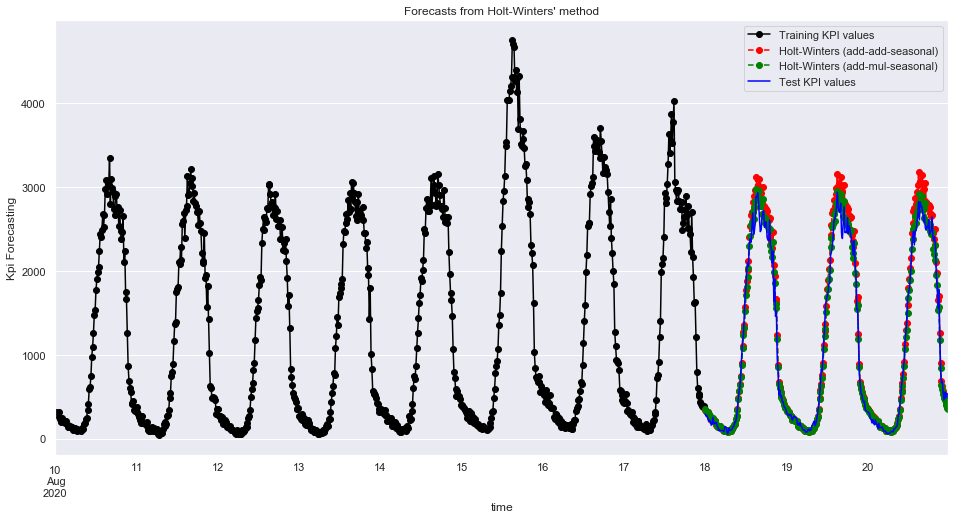

In [165]:
ax = df_train.plot(figsize=(16,8), marker='o', color='black', title="Forecasts from Holt-Winters' method" )
ax.set_ylabel("Kpi Forecasting")
ax.set_xlabel("Rops")
#fit1.fittedvalues.plot(ax=ax, style='--', color='red')
#fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(3*96).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(3*96).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

df_test.plot(ax=ax, color='blue', label="Test time series", legend=True)

plt.show()

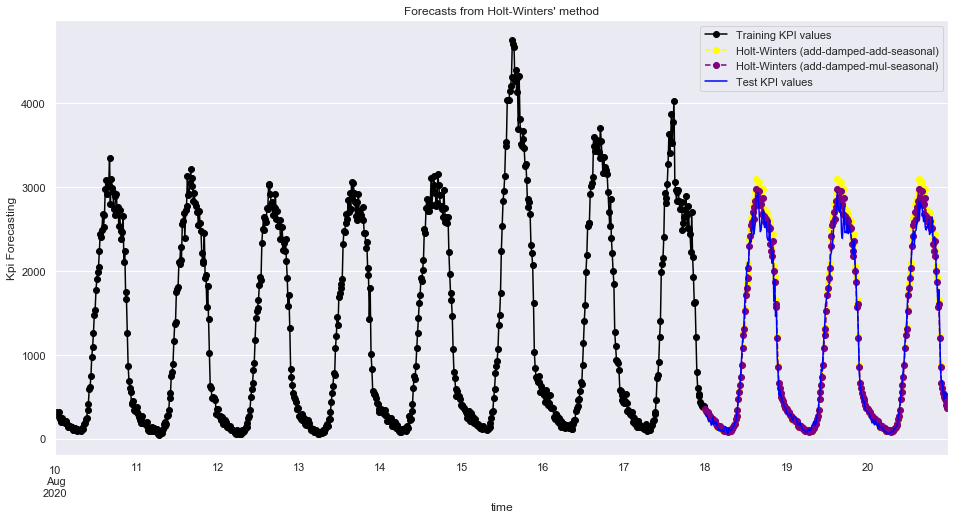

In [158]:
ax = df_train.plot(figsize=(16,8), marker='o', color='black', title="Forecasts from Holt-Winters' method" )
ax.set_ylabel("Kpi Forecasting")
ax.set_xlabel("Rops")
#fit3.fittedvalues.plot(ax=ax, style='--', color='yellow')
#fit4.fittedvalues.plot(ax=ax, style='--', color='purple')

fit3_forecast_df = fit3.forecast(3*96)
fit3_forecast_df.rename('Holt-Winters (add-damped-add-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)

fit4_forecast_df = fit4.forecast(3*96)
fit4_forecast_df.rename('Holt-Winters (add-damped-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='purple', legend=True)

df_test.plot(ax=ax, color='blue', label="Test time series", legend=True)

plt.show()

**Calculate metrics for the Fit1 model which has additive trend, additive seasonal of period season_length=96 and the use of a Box-Cox transformation:**

In [104]:
calculate_metrics(df_test, fit1.forecast(3*96))

Score with the MAE metric:  110.60459967770251
Score with the MSE metric:  27121.49650730311
Score with the RMSE metric:  164.68605438015422
Score with the r2 metric:  0.9746403511851182


**Calculate metrics for the Fit2 model which has an additive trend, multiplicative seasonal of period season_length=96 and the use of a Box-Cox transformation:**

In [105]:
calculate_metrics(df_test, fit2.forecast(3*96))

Score with the MAE metric:  67.66179418007346
Score with the MSE metric:  9725.504644190522
Score with the RMSE metric:  98.61797323100147
Score with the r2 metric:  0.9909062767883121


**Calculate metrics for the Fit3 model which has an additive damped trend, additive seasonal of period season_length=96 and the use of a Box-Cox transformation:**

In [115]:
calculate_metrics(df_test, fit3_forecast_df)

Score with the MAE metric:  94.78247680439841
Score with the MSE metric:  19568.58708468314
Score with the RMSE metric:  139.88776602935346
Score with the r2 metric:  0.9817026137869137


**Calculate metrics for the Fit4 model which has an additive damped trend, multiplicative seasonal of period season_length=96 and the use of a Box-Cox transformation:**

In [116]:
calculate_metrics(df_test, fit4_forecast_df)

Score with the MAE metric:  71.86371399890565
Score with the MSE metric:  10916.42775936106
Score with the RMSE metric:  104.4817101667132
Score with the r2 metric:  0.9897927175878412


In [149]:
results

,"(Add Trend, Add Seasonality)","(Add Trend, Mult Seasonality)","(Add Damped Trend, Add Seasonality)","(Add Damped Trend, Mult Seasonality)"
$\alpha$,4.801679e-01,4.879663e-01,4.797045e-01,4.889182e-01
$\beta$,1.546402e-13,1.253607e-14,6.332263e-08,5.714806e-06
$\phi$,NaN,NaN,9.100445e-01,9.190767e-01
$\gamma$,1.753015e-13,5.319238e-13,6.868088e-08,1.493468e-03
$l_0$,9.057058e+00,8.818947e+00,8.983810e+00,8.818299e+00
$b_0$,1.933453e-04,-1.553309e-04,3.490962e-02,3.400530e-02
SSE,8.444732e+06,8.516693e+06,8.448707e+06,8.523284e+06


**Based on the results we can clearly see that the "Additive Trend and Multiplicative Seasonality" model(fit2) performed the best(for scores see above)!**

**Second best was the "Additive damped Trend and Multiplicative seasonality" model (fit4).**

**Both of the two results are really good!**

**Question: Should we worry about some overfitting?**

In [176]:
fit2_df= fit2.forecast(3*96)

In [168]:
(df_test - fit2.forecast(3*96))

,2020-08-18 00:00:00,2020-08-18 00:15:00,2020-08-18 00:30:00,2020-08-18 00:45:00,2020-08-18 01:00:00,2020-08-18 01:15:00,2020-08-18 01:30:00,2020-08-18 01:45:00,2020-08-18 02:00:00,2020-08-18 02:15:00,...,2020-08-20 21:45:00,2020-08-20 22:00:00,2020-08-20 22:15:00,2020-08-20 22:30:00,2020-08-20 22:45:00,2020-08-20 23:00:00,2020-08-20 23:15:00,2020-08-20 23:30:00,2020-08-20 23:45:00,Test KPI values
time,,,,,,,,,,,,,,,,,,,,,
2020-08-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-20 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-20 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-20 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


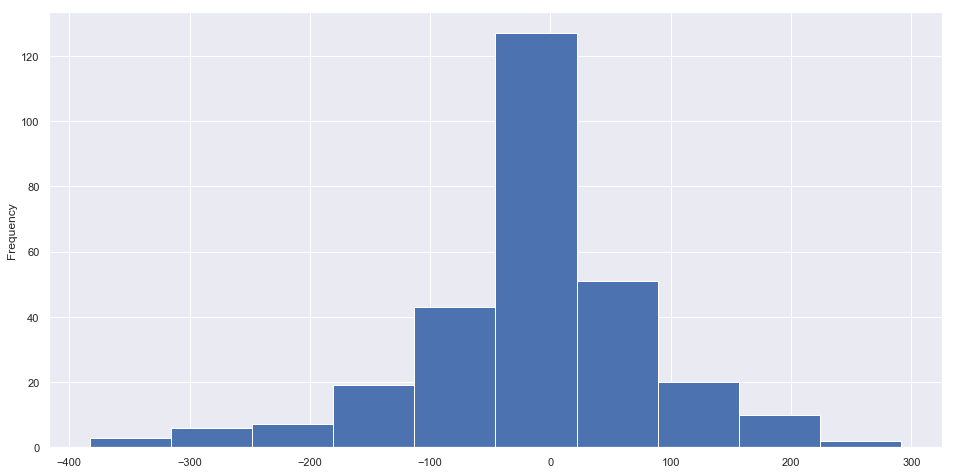

In [178]:
(df_test["Test KPI values"] - fit2_df).plot(kind='hist')

In [179]:
(df_test["Test KPI values"] - fit2_df).mean()

-15.582743265534058

In [ ]:
df_hourly_mean = df_test.groupby().mean()
#fit2 = ExponentialSmoothing(df_train, seasonal_periods=96, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()

## Validation

How to validate and test a time series model?
Due to the temporal dependencies in time series data, we cannot rely on usual validation techniques. To avoid biased evaluations we must ensure that training sets contains observations that occurred prior to the ones in validation sets.

A possible way to overcome this problem is to use a sliding window, as described here. This procedure is called time series cross validation and it is summarised in the following picture, in which the blue points represents the training sets in each “fold” and the red points represent the corresponding validation sets.

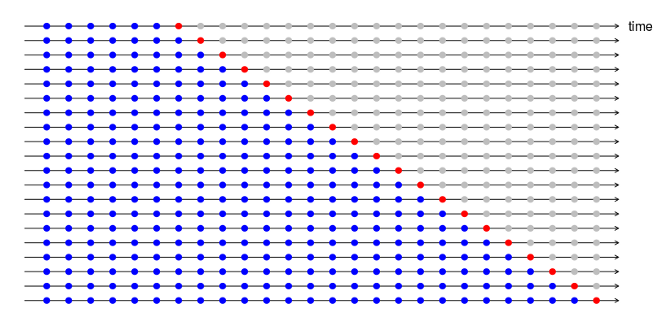

If we are interested in forecasting the next n time steps, we can apply the cross validation procedure for 1,2,…,n steps ahead. In this way we can also compare the goodness of the forecasts for different time horizons.

Once we have chosen the best model, we can fit it on the entire training set and evaluate its performance on a separate test set subsequent in time. The performance estimate can be done by using the same sliding window technique used for cross validation, but without re-estimating the model parameters.

### Additional material

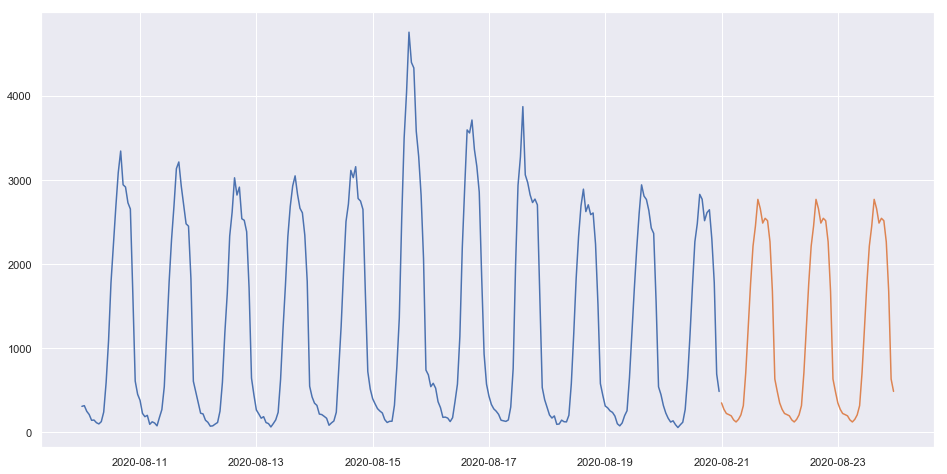

In [50]:
#elec_equip.index.freq = elec_equip.index.inferred_freq

stlf_hourly = STLForecast(df_hourly['kpi'], ARIMA, model_kwargs=dict(order=(1,1,0), trend="c"))
stlf_res_hourly = stlf_hourly.fit()

forecast = stlf_res_hourly.forecast(72)#forcast ahead 3 days
plt.plot(df_hourly['kpi'])
plt.plot(forecast)
plt.show()

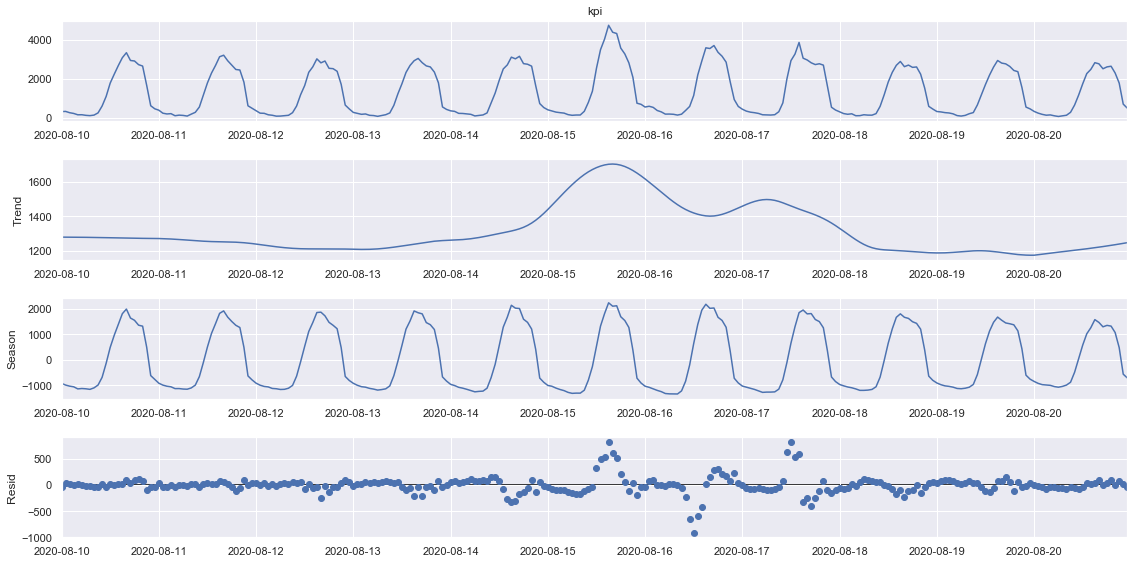

In [42]:
# Use STL without Robust=True parameter.
#The non-robust estimate places equal weights on all observations and so produces smaller errors, on average
res = STL(df_hourly['kpi']).fit() 
fig = res.plot()
plt.show()

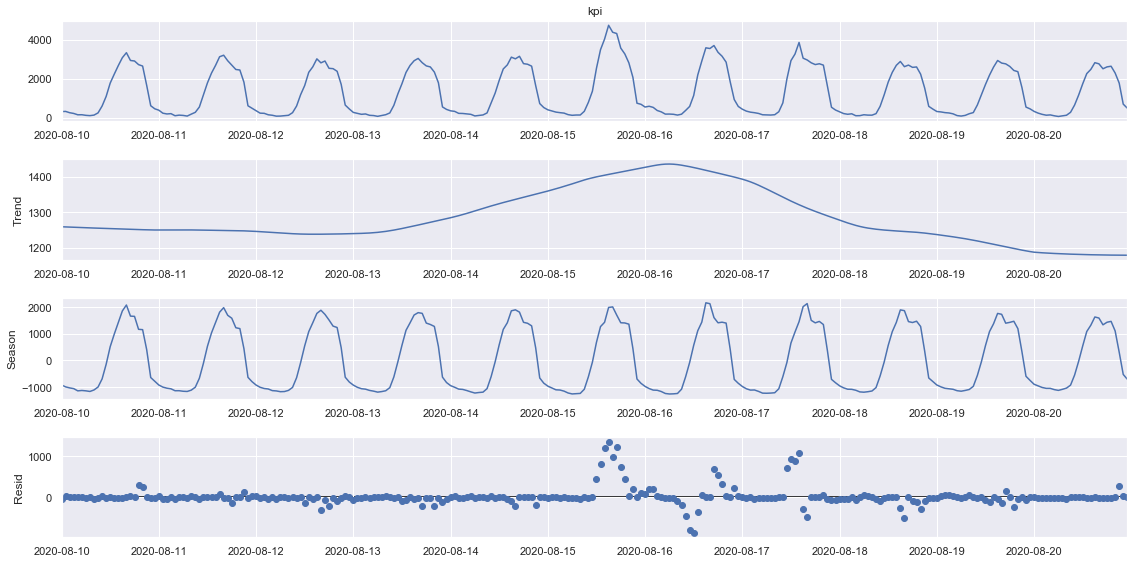

In [43]:
#Check robust version of STL(which using LOWESS), which is a weighted version of the algorithm 
#that is robust to some forms of outliers. 
res_robust = STL(df_hourly['kpi'], robust = True).fit() 
res_robust.plot()
plt.show()

In [64]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)

In [66]:
#Check robust version of STL(which using LOWESS), which is a weighted version of the algorithm 
#that is robust to some forms of outliers. 
res_robust = STL(df_hourly['kpi'], robust = True).fit() 
#res_robust.plot()
add_stl_plot(fig, res_robust, ['Non-robust', 'Robust'])
plt.show()